In [1]:
import requests
import json
import numpy as np
from time import sleep
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
import matplotlib.pyplot as plt

In [2]:
BET_AMOUNT = 1
LOOP = 50
START_CARDS = [("D","A"),("C","A"),("H","A")]

In [11]:
import requests

class HTTPRequest:
    def __init__(self, raw_request):
        self.method = None
        self.url = None
        self.headers = {}
        self.body = None
        self.cookies = {}
        self.parse_request(raw_request)
    
    def parse_request(self, raw_request):
        lines = raw_request.strip().split('\n')
        request_line = lines[0].split()
        self.method = request_line[0]

        # Parsing headers
        body_index = None
        for i, line in enumerate(lines[1:]):
            if line.strip() == '':
                body_index = i + 1
                break
            key, value = line.split(':', 1)
            if 'Cookie' in key:
                cookies = value.split(';')
                for cookie in cookies:
                    cookie_key, cookie_value = cookie.split('=', 1)
                    self.cookies[cookie_key.strip()] = cookie_value.strip()
            else:
                self.headers[key.strip()] = value.strip()
                
        self.url = 'https://' + self.headers['Host'] + request_line[1]
        
        
        # # Handling the body
        # if body_index:
        #     self.body = '\n'.join(lines[body_index + 1:])
            
    def set_body(self, body):
        self.body = json.dumps(body)

    def send(self):
        # Select the request method and send the request with the requests library
        if self.method.upper() == 'POST':
            response = requests.post(self.url, headers=self.headers, cookies=self.cookies, data=self.body, verify=False)
        else:
            raise ValueError(f"HTTP method {self.method} is not supported or not implemented in this function.")
        
        return response

# Example raw request (truncated for demonstration; you would use the full request you posted)
raw_request = """
POST /_api/graphql HTTP/2
Host: stake.com
Cookie: currency_hideZeroBalances=false; currency_currencyView=crypto; session_info=undefined; fiat_number_format=en; leftSidebarView_v2=expanded; sidebarView=hidden; casinoSearch=["Monopoly","Crazy Time","Sweet Bonanza","Money Train","Reactoonz"]; sportsSearch=["Liverpool FC","Kansas City Chiefs","Los Angeles Lakers","FC Barcelona","FC Bayern Munich"]; sportMarketGroupMap={}; oddsFormat=decimal; locale=en; currency_hideZeroBalances=false; currency_currencyView=crypto; fiat_number_format=en; leftSidebarView_v2=expanded; sidebarView=hidden; casinoSearch=["Monopoly","Crazy Time","Sweet Bonanza","Money Train","Reactoonz"]; sportsSearch=["Liverpool FC","Kansas City Chiefs","Los Angeles Lakers","FC Barcelona","FC Bayern Munich"]; sportMarketGroupMap={}; oddsFormat=decimal; locale=en; intercom-id-cx1ywgf2=e99c6f84-0cbb-43d8-83eb-50902431cb42; intercom-device-id-cx1ywgf2=4e5a5b7d-2a23-467c-9dea-b4eacf4c62ab; session=3fb25474fcd4a70eac4f659b59f7598c081e634536683a04ce2e1f2610fe74927c68a54c803eb27c67d49e7ecc5aea0c; session_info={"id":"4b81ae30-4927-4ce7-9ad2-5aca65915b57","sessionName":"Chrome (Unknown)","ip":"106.221.107.85","country":"IN","city":"Bhopal (B Sector)","active":true,"updatedAt":"Fri, 12 Apr 2024 17:06:46 GMT","__typename":"UserSession"}; currency_currency=inr; hideBalances=false; cookie_consent=true; currency_currency=inr; cookie_consent=true; __cf_bm=onujRHsJHSFvm.B8X9ZMAOhGgbp.GHLAL8_rbp0uZDY-1713815575-1.0.1.1-_dH5A7SizMpivEWfjS47MLH5KEqQKcR91P6XDZ1A08DloXO2lIVJK7mNJ6teMq6hO5BZN.jLrcwdYpKUlOXRVA; cf_clearance=snV1_ktHYGl7cMKgY8A35cWzkgcK_FDMMaPgD4zpozs-1713815576-1.0.1.1-KQJN1aLxy4Q7.1F_KxhNlzWgXBxnRdV2zYpD9QN8nnWKQejgrfuqOXURlzD8btxhp6On865gAZXzzN38.KU6QQ; intercom-session-cx1ywgf2=UUlHc1N6QXVZMElBbUN4QWRSb0gxV0srSkZqc2xwRFpISUczSTNvblNTTVVtN1VhNjNObVZHenNnbHNxcUlZcS0tajBPYlBobXVSZVVhR2VXbzJOeGJqUT09--d1bbf77c8b97498223e83934c1518b1dc19ab389
Content-Length: 714
Sec-Ch-Ua: "Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"
Dnt: 1
Sec-Ch-Ua-Full-Version-List: "Chromium";v="124.0.6367.61", "Google Chrome";v="124.0.6367.61", "Not-A.Brand";v="99.0.0.0"
Sec-Ch-Ua-Mobile: ?0
User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36
Sec-Ch-Ua-Arch: "arm"
Content-Type: application/json
Sec-Ch-Ua-Full-Version: "124.0.6367.61"
Sec-Ch-Ua-Platform-Version: "14.1.2"
Sec-Ch-Ua-Bitness: "64"
X-Lockdown-Token: s5MNWtjTM5TvCMkAzxov
X-Access-Token: 3fb25474fcd4a70eac4f659b59f7598c081e634536683a04ce2e1f2610fe74927c68a54c803eb27c67d49e7ecc5aea0c
Sec-Ch-Ua-Model: ""
Sec-Ch-Ua-Platform: "macOS"
Accept: */*
Origin: https://stake.com
Sec-Fetch-Site: same-origin
Sec-Fetch-Mode: cors
Sec-Fetch-Dest: empty
Referer: https://stake.com/casino/games/mines
Accept-Encoding: gzip, deflate, br
Accept-Language: en-US,en;q=0.9,hi;q=0.8,ru;q=0.7
Priority: u=1, i

{"query":"mutation MinesBet($amount: Float!, $currency: CurrencyEnum!, $minesCount: Int!, $fields: [Int!], $identifier: String) {\n  minesBet(\n    amount: $amount\n    currency: $currency\n    minesCount: $minesCount\n    fields: $fields\n    identifier: $identifier\n  ) {\n    ...CasinoBet\n    state {\n      ...CasinoGameMines\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameMines on CasinoGameMines {\n  mines\n  minesCount\n  rounds {\n    field\n    payoutMultiplier\n  }\n}\n","variables":{"currency":"inr","amount":0,"minesCount":3}}
"""

http_request = HTTPRequest(raw_request)
http_request.set_body({"query":"mutation HiloBet($amount: Float!, $currency: CurrencyEnum!, $startCard: HiloBetStartCardInput!) {\n  hiloBet(amount: $amount, currency: $currency, startCard: $startCard) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"currency":"inr","amount":BET_AMOUNT,"startCard":{"suit":"D","rank":"A"}}})
response = http_request.send()
print(response.status_code, response.text)

200 {"data":{"hiloBet":{"id":"901c7cb7-65af-4ad5-bf3e-0c477eef4995","active":true,"payoutMultiplier":0,"amountMultiplier":1,"amount":1,"payout":0,"updatedAt":"Mon, 22 Apr 2024 19:56:21 GMT","currency":"inr","game":"hilo","user":{"id":"8a064f6c-aa69-46ef-af41-d7f6148aa5aa","name":"vardan69"},"state":{"startCard":{"suit":"D","rank":"A"},"rounds":[]}}}}



In [12]:
# Guess higher
http_request.set_body({"query":"mutation HiloNext($guess: CasinoGameHiloGuessEnum!) {\n  hiloNext(guess: $guess) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"guess":"higher","rank":"9"}})

In [13]:
response = http_request.send()

In [14]:
response.json()["data"]["hiloNext"]["state"]["rounds"][-1]["card"]["rank"]

'J'

In [15]:
# Cashout
http_request.set_body({"query":"mutation HiloCashout {\n  hiloCashout {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{}})

In [16]:
round_response = http_request.send()
round_response.json()

{'data': {'hiloCashout': {'id': '901c7cb7-65af-4ad5-bf3e-0c477eef4995',
   'active': False,
   'payoutMultiplier': 1.0725,
   'amountMultiplier': 1,
   'amount': 1,
   'payout': 1.0725,
   'updatedAt': 'Mon, 22 Apr 2024 19:56:26 GMT',
   'currency': 'inr',
   'game': 'hilo',
   'user': {'id': '8a064f6c-aa69-46ef-af41-d7f6148aa5aa', 'name': 'vardan69'},
   'state': {'startCard': {'suit': 'D', 'rank': 'A'},
    'rounds': [{'card': {'suit': 'D', 'rank': 'J'},
      'guess': 'higher',
      'payoutMultiplier': 1.0725}]}}}}

In [17]:
round_response.json()["data"]["hiloCashout"]["payoutMultiplier"]

1.0725

In [18]:
def start_bet(amount, start_card):
    http_request.set_body({"query":"mutation HiloBet($amount: Float!, $currency: CurrencyEnum!, $startCard: HiloBetStartCardInput!) {\n  hiloBet(amount: $amount, currency: $currency, startCard: $startCard) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"currency":"inr","amount":amount,"startCard":{"suit":start_card[0],"rank":start_card[1]}}})
    return http_request.send()

def guess_higher():
    http_request.set_body({"query":"mutation HiloNext($guess: CasinoGameHiloGuessEnum!) {\n  hiloNext(guess: $guess) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"guess":"higher"}})
    return http_request.send()
    
def guess_lower():
    http_request.set_body({"query":"mutation HiloNext($guess: CasinoGameHiloGuessEnum!) {\n  hiloNext(guess: $guess) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"guess":"lower"}})
    return http_request.send()
    
def skip():
    http_request.set_body({"query":"mutation HiloNext($guess: CasinoGameHiloGuessEnum!) {\n  hiloNext(guess: $guess) {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{"guess":"skip"}})
    return http_request.send()
    
def cashout():
    http_request.set_body({"query":"mutation HiloCashout {\n  hiloCashout {\n    ...CasinoBet\n    state {\n      ...CasinoGameHilo\n    }\n  }\n}\n\nfragment CasinoBet on CasinoBet {\n  id\n  active\n  payoutMultiplier\n  amountMultiplier\n  amount\n  payout\n  updatedAt\n  currency\n  game\n  user {\n    id\n    name\n  }\n}\n\nfragment CasinoGameHilo on CasinoGameHilo {\n  startCard {\n    suit\n    rank\n  }\n  rounds {\n    card {\n      suit\n      rank\n    }\n    guess\n    payoutMultiplier\n  }\n}\n","variables":{}})
    return http_request.send()

def get_direction(rounds):
    last = rounds[-1]["card"]["rank"]
    skips = 0
    while last != "K" and last != "A":
        if skips > 11:
            return None
        skips += 1
        resp = skip().json()
        last = resp["data"]["hiloNext"]["state"]["rounds"][-1]["card"]["rank"]
        # print(last)
        sleep(0.1)
    # input(">")
    return last == "A"

In [19]:
payouts = []
profit = [0]
for i in range(LOOP):
    rand_index = np.random.randint(0, len(START_CARDS))
    card = START_CARDS[rand_index]
    start_bet(BET_AMOUNT, card)
    resp = guess_higher().json()
    
    
    # return true for high
    try:
        for i in range(1):
            direction = get_direction(resp["data"]["hiloNext"]["state"]["rounds"])
            
            if direction is None:
                break
            
            if direction:
                guess_higher()
            else:
                guess_lower()
    
        resp = cashout().json()
        print(f'Payout: {resp["data"]["hiloCashout"]["payoutMultiplier"]}')
        payouts.append(resp["data"]["hiloCashout"]["payoutMultiplier"])
        profit.append(profit[-1] + resp["data"]["hiloCashout"]["payoutMultiplier"] - 1)
    except TypeError:
        print("----LOST----")
        payouts.append(-1)
        profit.append(profit[-1] - 1)
    
    sleep(1)

----LOST----
Payout: 1.161875
Payout: 1.161875
Payout: 1.161875
Payout: 1.161875


KeyboardInterrupt: 

In [20]:
np.random.randint(0,10)

8

Text(0.5, 0, 'Rounds')

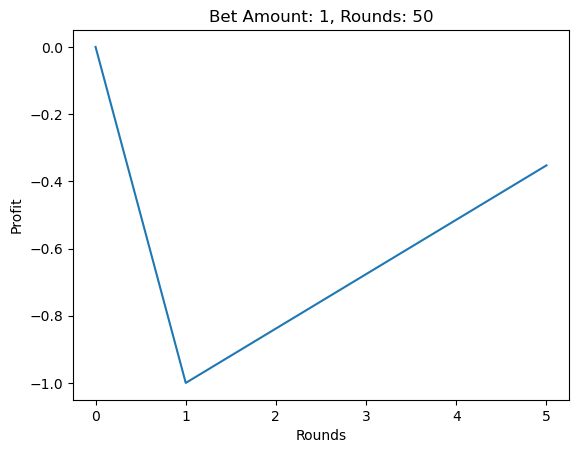

In [21]:
plt.plot(profit)
plt.title(f"Bet Amount: {BET_AMOUNT}, Rounds: {LOOP}")
plt.ylabel("Profit")
plt.xlabel("Rounds")

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 4.]),
 array([-1.       , -0.7838125, -0.567625 , -0.3514375, -0.13525  ,
         0.0809375,  0.297125 ,  0.5133125,  0.7295   ,  0.9456875,
         1.161875 ]),
 <BarContainer object of 10 artists>)

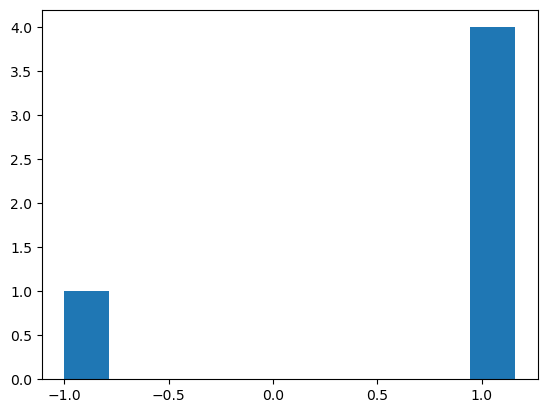

In [22]:
plt.hist(payouts)

# Expectations
- Expected returns: 0.913 (compared to a bet size of 1 unit)
- Expected profit: -0.0869 (for each 1 unit of betting)

We lose 8.6% of our bet size in the long run

In [ ]:
prob_ace = 4 / 52
prob_not_ace = 1 - prob_ace

expected_gain_per_round = prob_not_ace * 1.07  # Gain when not an Ace
expected_loss_per_round = prob_ace * 1         # Loss when an Ace

# New winning multiplier when not an Ace
win_multiplier_not_ace_updated = 1.0725

# Expected gain per round with updated multiplier
expected_gain_per_round_updated = prob_not_ace * win_multiplier_not_ace_updated  # Gain when not an Ace

# Net expected return per round with the updated multiplier
net_expected_return_per_round_updated = expected_gain_per_round_updated - expected_loss_per_round

# Adjusted net expected return per round with the updated multiplier (subtracting the initial bet)
adjusted_net_expected_return_per_round_updated = net_expected_return_per_round_updated - 1

net_expected_return_per_round_updated, adjusted_net_expected_return_per_round_updated

(0.9130769230769231, -0.08692307692307688)